# Summary of experiments

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, time, pickle

sys.path.insert(1, '../../src/')
from aux import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 40})
fig_path='fig/'
fig_path='../../../madmix-tex/fig/'

In [183]:
########################
########################
#     load results    #
########################
########################

# mad mix
madmix_elbos=pkl_load('results/madmix_elbos_toydiscrete')
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_ising')))
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_gmm')))
madmix_elbos=madmix_elbos[-madmix_elbos<np.inf]

madmix_cput=pkl_load('results/madmix_cput_toydiscrete')
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_ising')))
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_gmm')))


# gibbs
gibbs_elbos=pkl_load('results/gibbs_elbos_toydiscrete')
gibbs_elbos=np.hstack((gibbs_elbos,pkl_load('results/gibbs_elbos_ising')))
gibbs_elbos=gibbs_elbos[-gibbs_elbos<np.inf]

gibbs_cput=pkl_load('results/gibbs_cput_toydiscrete')
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_ising')))
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_gmm')))


# mean field
meanfield_elbos=pkl_load('results/meanfield_elbos_toydiscrete')
meanfield_elbos=np.hstack((meanfield_elbos,pkl_load('results/meanfield_elbos_ising')))
meanfield_elbos=np.hstack((meanfield_elbos,pkl_load('results/meanfield_elbos_gmm')))
meanfield_elbos=meanfield_elbos[-meanfield_elbos<np.inf]

meanfield_cput=pkl_load('results/meanfield_cput_toydiscrete')
meanfield_cput=np.hstack((meanfield_cput,pkl_load('results/meanfield_cput_ising')))
meanfield_cput=np.hstack((meanfield_cput,pkl_load('results/meanfield_cput_gmm')))


# concrete
concrete_elbos=pkl_load('results/concrete_elbos_toydiscrete')
concrete_elbos=np.vstack((concrete_elbos,pkl_load('results/concrete_elbos_ising')[np.newaxis,:]))
#concrete_elbos=concrete_elbos[-concrete_elbos<np.inf]

concrete_cput=pkl_load('results/concrete_cput_toydiscrete')
concrete_cput=np.vstack((concrete_cput,pkl_load('results/concrete_cput_ising')[np.newaxis,:]))
concrete_cput=np.vstack((concrete_cput,pkl_load('results/concrete_cput_ising')[np.newaxis,:]))
concrete_cput_gmm_pg=pkl_load('results/concrete_cput_gmm_pg')
concrete_cput_gmm_wf=pkl_load('results/concrete_cput_gmm_wf')
#concrete_cput=concrete_cput[concrete_cput>0]

concrete_density_cput = pkl_load('results/concrete_densitycput_toydiscrete')
concrete_density_cput = np.vstack((concrete_density_cput,pkl_load('results/concrete_densitycput_ising')))

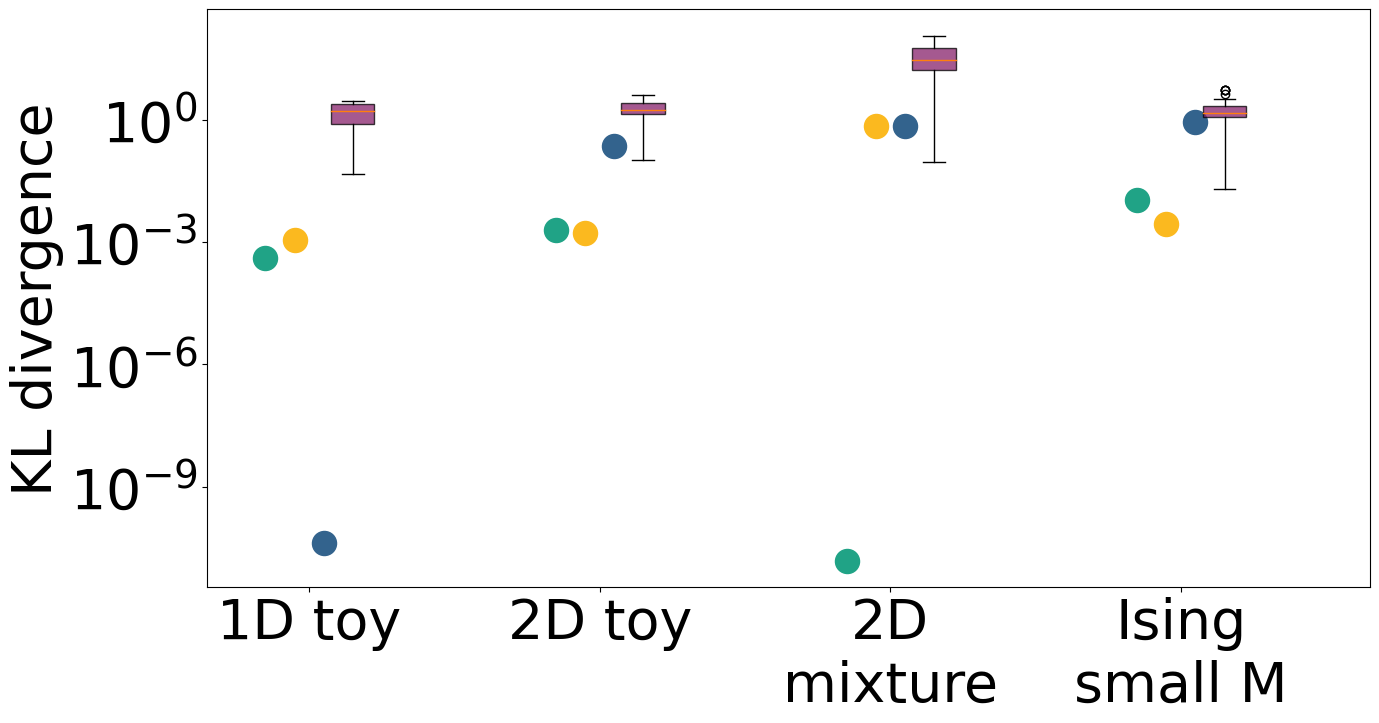

In [40]:
########################
########################
#      elbos plot      #
########################
########################
offset=0.1
marker_size=300

mad_offset=-1.5
gibbs_offset=-0.5
meanfield_offset=0.5
concrete_offset=1.5

# first toy discrete example
plt.scatter([0+mad_offset*offset],[-madmix_elbos[0]],s=marker_size,c='#20A386FF',label='Mad Mix (ours)')
plt.scatter([0+gibbs_offset*offset],[-gibbs_elbos[0]],s=marker_size,c='#FBB91FFF',label='Gibbs')
plt.scatter([0+meanfield_offset*offset],[-meanfield_elbos[0]],s=marker_size,c='#33638D',label='Mean Field')
conc_tmp=np.copy(concrete_elbos[0,:])
conc_tmp=conc_tmp[-conc_tmp<np.inf]
bp0=plt.boxplot(-conc_tmp,positions=[0+concrete_offset*offset], patch_artist=True)

# second toy discrete example
plt.scatter([1+mad_offset*offset],[-madmix_elbos[1]],s=marker_size,c='#20A386FF')
plt.scatter([1+gibbs_offset*offset],[-gibbs_elbos[1]],s=marker_size,c='#FBB91FFF')
plt.scatter([1+meanfield_offset*offset],[-meanfield_elbos[1]],s=marker_size,c='#33638D')
conc_tmp=np.copy(concrete_elbos[1,:])
conc_tmp=conc_tmp[-conc_tmp<np.inf]
bp1=plt.boxplot(-conc_tmp,positions=[1+concrete_offset*offset], patch_artist=True)

# third toy discrete example
plt.scatter([2+mad_offset*offset],[-madmix_elbos[2]],s=marker_size,c='#20A386FF')
plt.scatter([2+gibbs_offset*offset],[-gibbs_elbos[2]],s=marker_size,c='#FBB91FFF')
plt.scatter([2+meanfield_offset*offset],[-meanfield_elbos[2]],s=marker_size,c='#33638D')
conc_tmp=np.copy(concrete_elbos[2,:])
conc_tmp=conc_tmp[-conc_tmp<np.inf]
bp2=plt.boxplot(-conc_tmp,positions=[2+concrete_offset*offset], patch_artist=True)

# small M ising model
plt.scatter([3+mad_offset*offset],[-madmix_elbos[3]],s=marker_size,c='#20A386FF')
plt.scatter([3+gibbs_offset*offset],[-gibbs_elbos[3]],s=marker_size,c='#FBB91FFF')
plt.scatter([3+meanfield_offset*offset],[-meanfield_elbos[3]],s=marker_size,c='#33638D')
conc_tmp=np.copy(concrete_elbos[3,:])
conc_tmp=conc_tmp[-conc_tmp<np.inf]
bp3=plt.boxplot(-conc_tmp,positions=[3+concrete_offset*offset], patch_artist=True)

# fill concrete boxplots with colors
colors = ['#87216BFF', '#87216BFF', '#87216BFF','#87216BFF']
i=0
for bplot in (bp0,bp1,bp2,bp3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1

plt.ylabel('KL divergence')
plt.yscale('log')
#plt.legend(fontsize='small',frameon=True,loc='lower right')
#plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=2)
#plt.ylim(top=1000)
plt.xticks(ticks=[0,1,2,3],labels=['1D toy', '2D toy', '2D\nmixture', 'Ising\nsmall M']);
plt.savefig(fig_path+'summary_elbos.pdf', dpi=300, bbox_inches='tight')

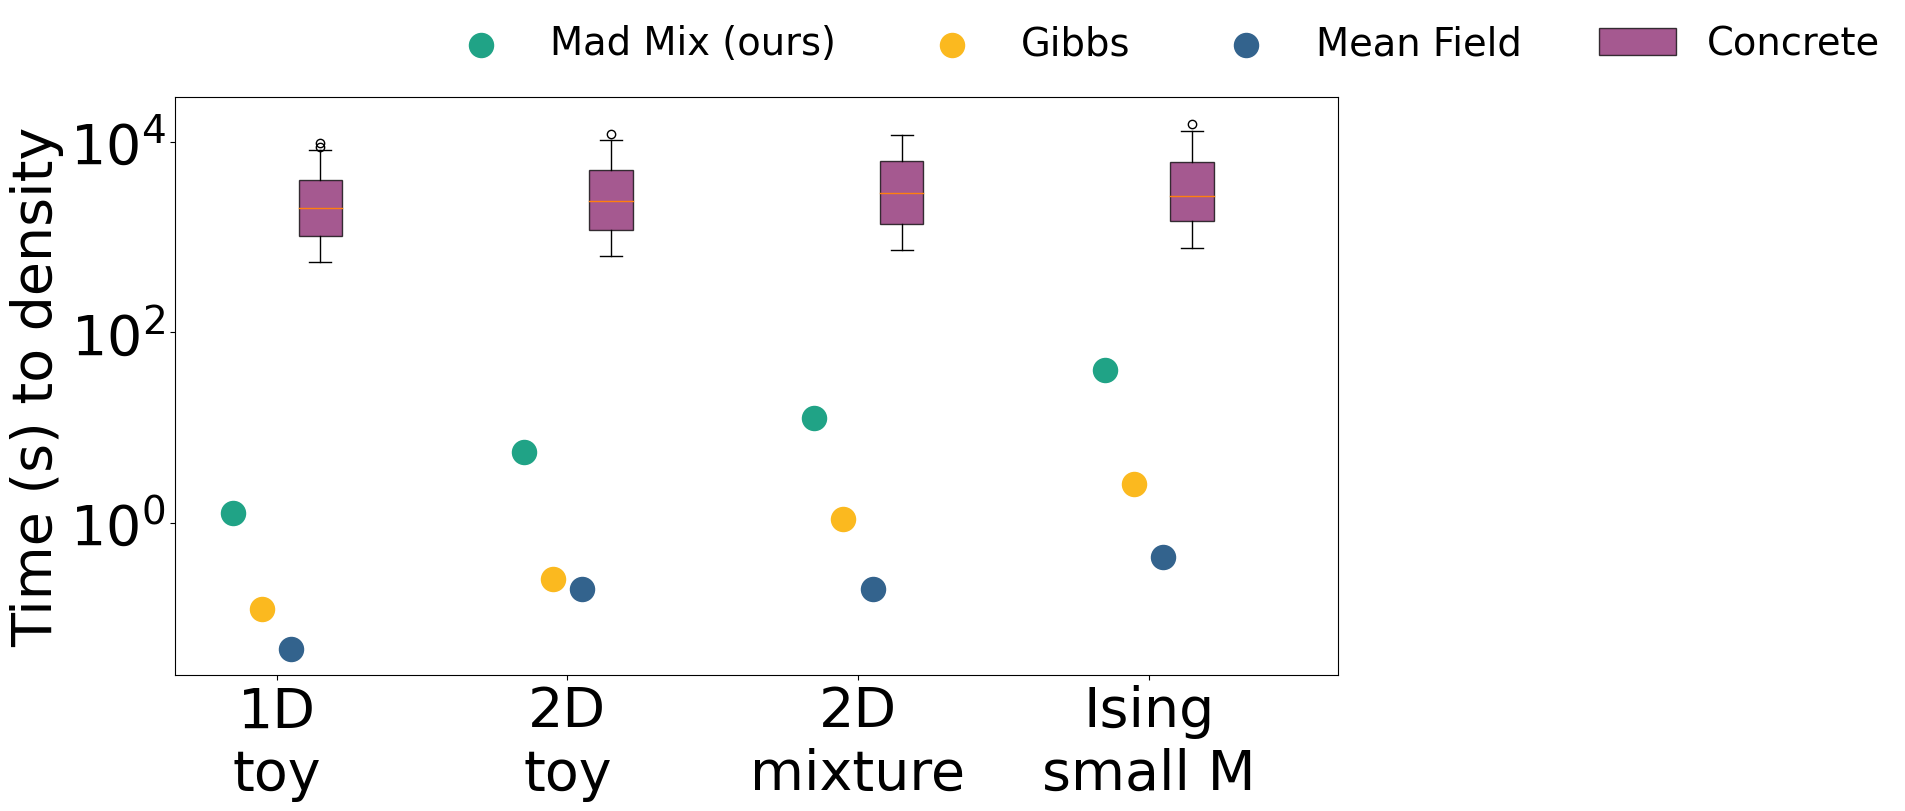

In [69]:
########################
########################
#    cpu times plot    #
########################
########################
plt.rcParams["legend.framealpha"]=1
plt.rcParams["legend.edgecolor"]='black'
offset=0.1
increase=1#0.25
marker_size=300

mad_offset=-1.5
gibbs_offset=-0.5
meanfield_offset=0.5
concrete_offset=1.5

# first toy discrete example
plt.scatter([0+mad_offset*offset],[madmix_cput[0]],s=marker_size,c='#20A386FF',label='Mad Mix (ours)')
plt.scatter([0+gibbs_offset*offset],[gibbs_cput[0]],s=marker_size,c='#FBB91FFF',label='Gibbs')
plt.scatter([0+meanfield_offset*offset],[meanfield_cput[0]],s=marker_size,c='#33638D',label='Mean Field')
conc_tmp=np.copy(concrete_cput[0,:])
conc_tmp=conc_tmp[conc_tmp>0]
bp0=plt.boxplot(conc_tmp,positions=[0+concrete_offset*offset], patch_artist=True)

# second toy discrete example
plt.scatter([increase+mad_offset*offset],[madmix_cput[1]],s=marker_size,c='#20A386FF')
plt.scatter([increase+gibbs_offset*offset],[gibbs_cput[1]],s=marker_size,c='#FBB91FFF')
plt.scatter([increase+meanfield_offset*offset],[meanfield_cput[1]],s=marker_size,c='#33638D')
conc_tmp=np.copy(concrete_cput[1,:])
conc_tmp=conc_tmp[conc_tmp>0]
bp1=plt.boxplot(conc_tmp,positions=[increase+concrete_offset*offset], patch_artist=True)

# third toy discrete example
plt.scatter([2*increase+mad_offset*offset],[madmix_cput[2]],s=marker_size,c='#20A386FF')
plt.scatter([2*increase+gibbs_offset*offset],[gibbs_cput[2]],s=marker_size,c='#FBB91FFF')
plt.scatter([2*increase+increase*meanfield_offset*offset],[meanfield_cput[2]],s=marker_size,c='#33638D')
conc_tmp=np.copy(concrete_cput[2,:])
conc_tmp=conc_tmp[conc_tmp>0]
bp2=plt.boxplot(conc_tmp,positions=[2*increase+concrete_offset*offset], patch_artist=True)

# small M ising model
plt.scatter([3*increase+mad_offset*offset],[madmix_cput[3]],s=marker_size,c='#20A386FF')
plt.scatter([3*increase+gibbs_offset*offset],[gibbs_cput[3]],s=marker_size,c='#FBB91FFF')
plt.scatter([3*increase+meanfield_offset*offset],[meanfield_cput[3]],s=marker_size,c='#33638D')
conc_tmp=np.copy(concrete_cput[3,:])
conc_tmp=conc_tmp[conc_tmp>0]
bp3=plt.boxplot(conc_tmp,positions=[3*increase+concrete_offset*offset], patch_artist=True)

# fill concrete boxplots with colors
colors = ['#87216BFF', '#87216BFF', '#87216BFF','#87216BFF']
i=0
for bplot in (bp0,bp1,bp2,bp3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1

plt.ylabel('Time (s) to density')
plt.yscale('log')
#plt.legend(fontsize='x-small',frameon=True,loc='center left')
plt.legend(fontsize='x-small',ncol=4,frameon=False,bbox_to_anchor=(0.2, 1.))
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
#plt.ylim(top=1000000)
plt.xticks(ticks=[0,increase,2*increase,3*increase],labels=['1D\ntoy', '2D\ntoy', '2D\nmixture', 'Ising\nsmall M']);
#plt.xlim(0-2*0.075,3*increase+2*0.075)
#plt.savefig(fig_path+'summary_cput.pdf', dpi=300, bbox_inches='tight')

## Together

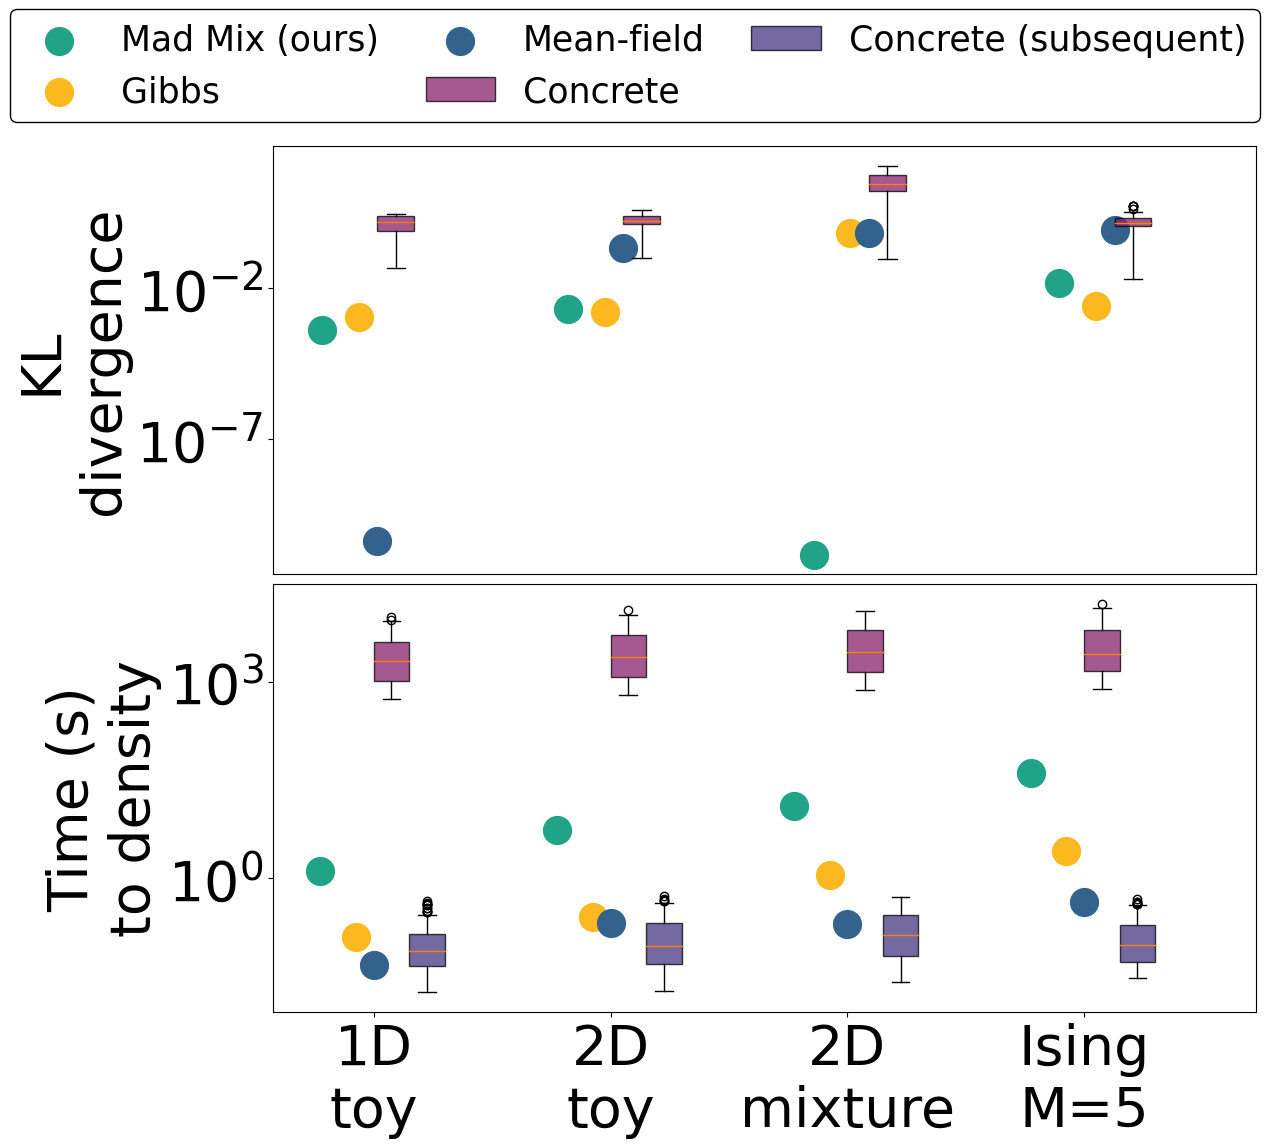

In [261]:
########################
########################
#      PLOTTING       #
########################
########################

# settings
fig, axs = plt.subplots(2,1, figsize=(12.5,10), constrained_layout=True)

increase=1.
offset=0.15
marker_size=400

mad_offset=-1.5
gibbs_offset=-0.5
meanfield_offset=0.
concrete_offset=0.5
concrete_density_offset=1.5

########################
########################
#      elbos plot      #
########################
########################

bps = [None for i in range(4)]
for i in range(4):
    axs[0].scatter([i+mad_offset*offset],[-madmix_elbos[i]],s=marker_size,c='#20A386FF')
    axs[0].scatter([i+gibbs_offset*offset],[-gibbs_elbos[i]],s=marker_size,c='#FBB91FFF')
    axs[0].scatter([i+meanfield_offset*offset],[-meanfield_elbos[i]],s=marker_size,c='#33638D')
    conc_tmp=np.copy(concrete_elbos[i,:])
    conc_tmp=conc_tmp[-conc_tmp<np.inf]
    bps[i]=axs[0].boxplot(-conc_tmp,positions=[i*increase+concrete_offset*offset], patch_artist=True)
# end for


# fill concrete boxplots with colors
colors = ['#87216BFF', '#87216BFF', '#87216BFF','#87216BFF']
i=0
for bplot in (bps[0],bps[1],bps[2],bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
# end for
        
axs[0].set_ylabel('KL\ndivergence')
axs[0].set_yscale('log')
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off



########################
########################
#    cpu times plot    #
########################
########################
plt.rcParams["legend.framealpha"]=1
plt.rcParams["legend.edgecolor"]='black'

bps = [None for i in range(4)]
bpsbis = [None for i in range(4)]
for i in range(4):
    axs[1].scatter([i*increase+mad_offset*offset],[madmix_cput[i]],s=marker_size,c='#20A386FF',
                   label='Mad Mix (ours)' if i == 0 else '')
    axs[1].scatter([i*increase+gibbs_offset*offset],[gibbs_cput[i]],s=marker_size,c='#FBB91FFF',
                   label='Gibbs' if i == 0 else '')
    axs[1].scatter([i*increase+meanfield_offset*offset],[meanfield_cput[i]],s=marker_size,c='#33638D',
                   label='Mean-field' if i == 0 else '')
    conc_tmp=np.copy(concrete_cput[i,:])
    conc_tmp=conc_tmp[conc_tmp>0]
    bps[i]=axs[1].boxplot(conc_tmp,positions=[i*increase+concrete_offset*offset], patch_artist=True)
    conc_tmp=np.copy(concrete_density_cput[i,:])
    conc_tmp=conc_tmp[conc_tmp>0]
    bpsbis[i]=axs[1].boxplot(conc_tmp,positions=[i*increase+concrete_density_offset*offset], patch_artist=True)
# end for


# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(4)]
i=0
for bplot in (bps[0],bps[1],bps[2],bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
# end for
        
# fill concrete subsequent density boxplots with colors
colors = ['#453781' for i in range(4)]
i=0
for bplot in (bpsbis[0],bpsbis[1],bpsbis[2],bpsbis[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete (subsequent)')
        i=i+1
# end for
    
axs[1].set_ylabel('Time (s)\nto density')
axs[1].set_yscale('log')
axs[1].set_xticks(ticks=[0,increase,2*increase,3*increase,],
                  labels=['1D\ntoy', '2D\ntoy', '2D\nmixture', 'Ising\nM=5']);


handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0, 1.02, 1, 0.2), 
           loc="lower left",mode="expand", borderaxespad=0, ncol=3, fontsize=25)
#plt.savefig(fig_path+'summary_both_discrete.pdf', dpi=300, bbox_inches='tight')

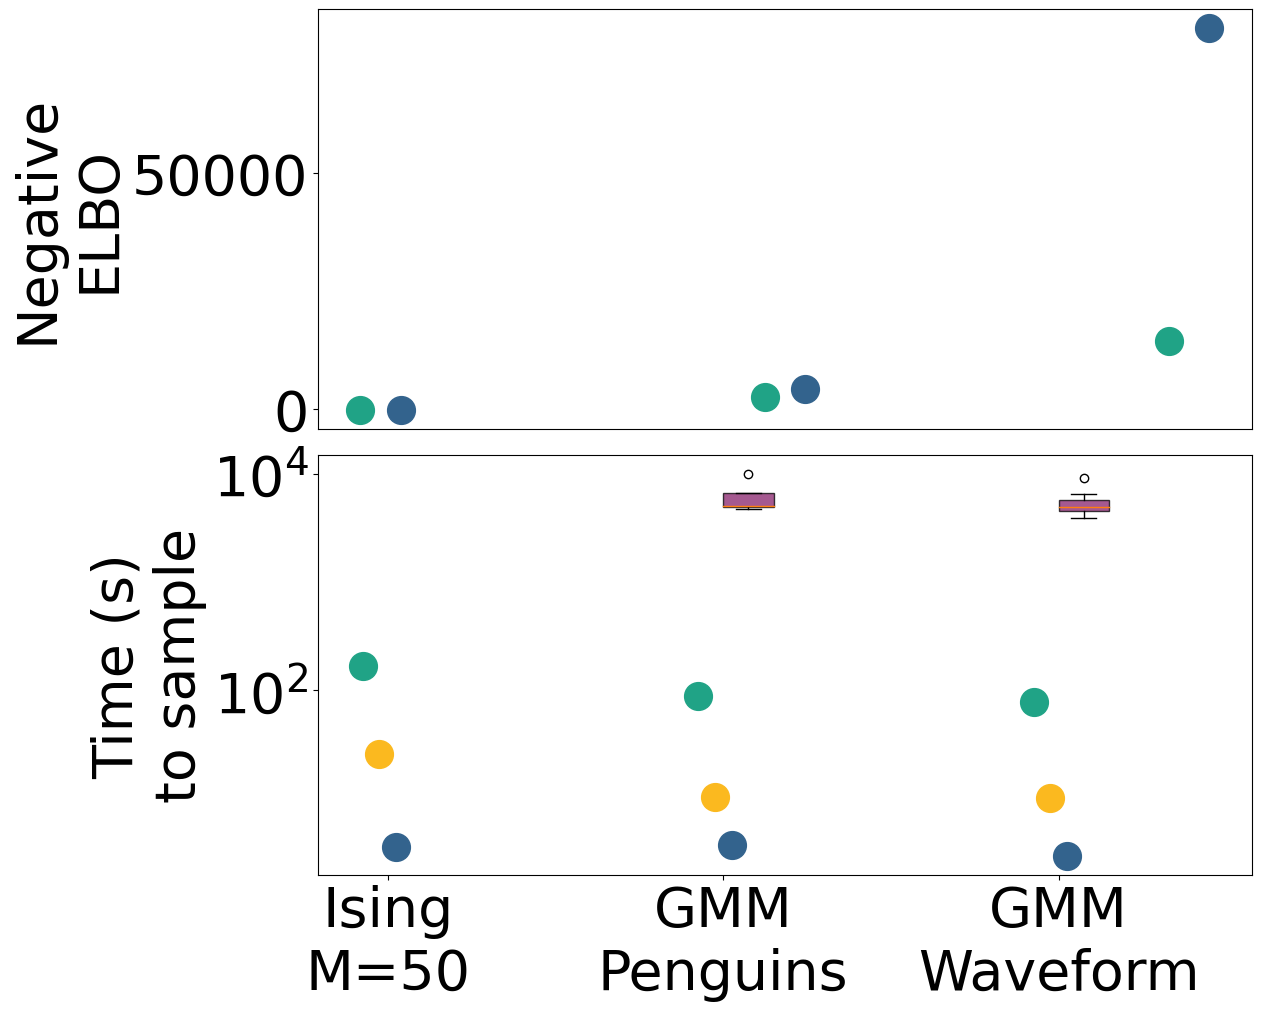

In [264]:
########################
########################
#      PLOTTING       #
########################
########################

# settings
fig, axs = plt.subplots(2,1, figsize=(12.5,10), constrained_layout=True)

offset=0.05
marker_size=400

mad_offset=-1.5
gibbs_offset=-0.5
meanfield_offset=0.5
concrete_offset=1.5

########################
########################
#      elbos plot      #
########################
########################

for i in range(3):
    axs[0].scatter([i+mad_offset*offset],[-madmix_elbos[i+4]],s=marker_size,c='#20A386FF')
    axs[0].scatter([i+meanfield_offset*offset],[-meanfield_elbos[i+4]],s=marker_size,c='#33638D')
# end for

# fill concrete boxplots with colors
colors = ['#87216BFF', '#87216BFF', '#87216BFF','#87216BFF']


axs[0].set_ylabel('Negative\nELBO')
#axs[0].set_yscale('log')
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


########################
########################
#    cpu times plot    #
########################
########################
plt.rcParams["legend.framealpha"]=1
plt.rcParams["legend.edgecolor"]='black'
bps = [axs[1].boxplot(concrete_cput_gmm_pg,positions=[1*increase+concrete_offset*offset], patch_artist=True), 
       axs[1].boxplot(concrete_cput_gmm_wf,positions=[2*increase+concrete_offset*offset], patch_artist=True)]


for i in range(3):
    axs[1].scatter([i*increase+mad_offset*offset],[madmix_cput[i+4]],s=marker_size,c='#20A386FF',
                   label='Mad Mix (ours)' if i == 0 else '')
    axs[1].scatter([i*increase+gibbs_offset*offset],[gibbs_cput[i+4]],s=marker_size,c='#FBB91FFF',
                   label='Gibbs' if i == 0 else '')
    axs[1].scatter([i*increase+meanfield_offset*offset],[meanfield_cput[i+4]],s=marker_size,c='#33638D',
                   label='Mean-field' if i == 0 else '')
# end for

# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(2)]
i=0
for bplot in (bps[0],bps[1]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1

axs[1].set_ylabel('Time (s)\nto sample')
axs[1].set_yscale('log')
axs[1].set_xticks(ticks=[0,increase,2*increase],
                  labels=['Ising\nM=50','GMM\nPenguins','GMM\nWaveform']);


handles, labels = axs[1].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(0, 1.02, 1, 0.2), 
#           loc="lower left",mode="expand", borderaxespad=0, ncol=4, fontsize=26)
#plt.savefig(fig_path+'summary_both_cont.pdf', dpi=300, bbox_inches='tight')